# [AIFFEL_Exploration_10] Computer Vision Project

## 프로젝트 구성
두 개의 미니 프로젝트로 구성    
**1. 프로젝트 1. Image Classification**     
**2. 프로젝트 2. Object Detection**     

## 목차
*1. 프로젝트 1. Image Classification*   
2. 결론    
**3. 탐구 및 시도 ㅇ모음(프로젝트 진행 중 더 알아보고 시도해 부분들 모음)**           
4. 프로젝트 2. Object Detection   
5. 결론     
**6. 탐구 및 시도 모음**       
7. 회고     
8. References    

## 글씨 색 표시
#### <span style = "color:orange;">- 노랑: 질문! or 짚고가자!</span>    
#### <span style = "color:red;">- 빨강: 중요 or 특이사항</span>

# 프로젝트 1. Image Classification

### 문제 1-1. VGG16 모델 구현하기
### 문제 1-2. 다양한 방법을 사용하여 모델의 성능 올리기

### Step 1. 필요한 라이브러리 불러오기

In [1]:
import os

### <span style = "color:orange;">질문! import os의 의미</span>    
os는 파일의 경로나 폴더에 관한 처리를 하는 라이브러리이다.    
**import os는**     
os를 사용하기 위해 import 한다는 의미로 해석할 수 있다.     
[출처: https://blog.naver.com/jinho381/222410702680]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import models, layers, optimizers, utils 
!pip install IPython # 주피터에 이미지를 넣기 위해 패키지 설치 
from IPython.display import Image

## VGG16 모델

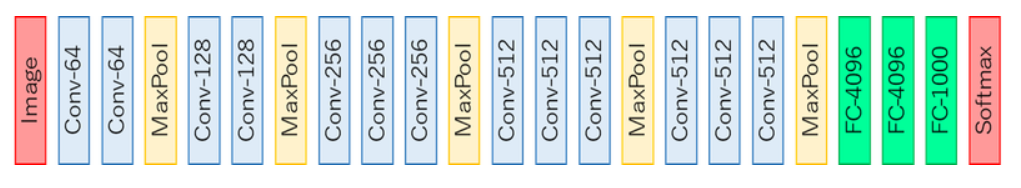

In [3]:
Image("[E-10] images/04.PNG")

### 문제 1-1. VGG16 모델 구현하기
- 영상의 내용을 참고하여 직접 코드로 모델을 구현해 보기
- Batch Normalization, Parameter Initialization 등을 사용할 수도 있다.

### Step 2. 추가로 필요한 라이브러리 불러오기

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Step 3. 필요한 데이터 준비
- 불러온 데이터는 캐글에서 제공되는 개와 고양이의 데이터
- 개와 고양이를 분류할 예정 
- test 데이터에서 1은 개, 0은 고양이를 의미한다.

In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68616192/68606236 [==============================] - 0s 0us/step


### <span style = "color:orange;">질문! os.path.join의 의미</span>    
**os.path.join("경로","경로",...)**     
문자열로 된 경로를 합쳐서 새로운 경로를 만든다는 뜻이라고 한다.    
[출처: https://blog.naver.com/jinho381/222410702680]

In [6]:
# train 데이터와 validation 데이터에서 개와 고양이 이미지가 저장된 경로를 각각 변수에 저장해 두기
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [7]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [8]:
# train 데이터와 validation 데이터의 개수 알아보기
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


### <span style = "color:red;">이를 통해서 알 수 있는 것</span>  

train 고양이 이미지의 수: 1000     
train 개 이미지의 수: 1000

검증 고양이 이미지의 수 : 500    
검증 개 이미지의 수: 500

전체 train 데이터의 수: 2000    
전체 검증데이터의 수: 1000

그럼 전체 데이터는 3000개

개와 고양이의 데이터    
test 데이터에서 1은 개, 0은 고양이를 의미

### Step 4. 필요한 파라미터를 설정해주기
- 파라미터를 수정하면 성능을 높일 수 있으니 다양한 실험해 보기

In [9]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

### Step 5. 이미지를 확인하기 위해 데이터를 시각화하는 함수를 만들기

In [10]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10)) # 1행 5열의 크기가 피그사이즈 10*10으로 그래프를 그리는 코드
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img) # imshow 코드 의미 공부하기
        ax.axis('off')
    plt.tight_layout()
    plt.show()

### Step 6. 데이터 증강하기

**[노드 내용 정리]**    
train 데이터가 2천장 밖에 되지 않기 때문에 Data Augmentation(데이터 증강)을 통해 데이터의 수를 늘린다.

Data Augmentation은 Rescale, Rotation, Random Crop, Zoom, Flip 등 다양한 기법을 사용하여 데이터의 양을 증가시키는 것      
range의 숫자를 변화시키거나 Flip에서 True/False를 적절하게 사용하여 다양한 실험을 해볼 수 있다고 한다.

### <span style = "color:orange;"> 질문! 데이터 증강에 대해서</span>  
1. 왜 하는 거죠?
2. 꼭 필요한 건가요?

**데이터 증강이란?**    
데이터의 양을 늘리기 위해 원본에 각종 변환을 적용하여 개수를 증강시키는 방법    
[출처: https://blog.naver.com/dilector/222569536908]

데이터의 핵심 특징은 간직한 채, 노이즈를 더하여 데이터를 확장하는 부분이 중요하다고 한다.    
이를 통해 노이즈에 강인한 robust 모델을 얻는게 중요

위 참고자료에서는 여러 기법들이 있다는 내용도 확인할 수 있었다.

**또 다른 참고자료에서는**

데이터 증강을 적용하면 과적합이 크게 줄어들고 훨씬 더 높은 분류 정확도를 얻을 수 있다고 함    
[출처: https://blog.naver.com/mikangel/222334698758]
    
**데이터증강이란**    
클래스 레이블이 변경되지 않도록 임의의 지터 및 교란을 적용하여 원본에서 새로운 훈련샘플을 생성하는데 사용되는 광범위한 기술을 포함    
데이터 증대를 적용할 때 우리의 목표는 모델의 일반화 가능성을 높이는 것이다.     
네트워크가 지속적으로 약간 수정된 새 버전의 입력 데이터 포인트를 보고 있다는 점을 감안할 때 더 강력한 기능을 학습할 수 있다.     
     
그러나     
테스트시에는 데이터 증대를 적용하지 않고 훈련된 네트워크를 평가하지 않는다.     
대부분의 경우 훈련 정확도가 약간 떨어지더라도 테스트 정확도가 향상되는 것을 확인할 수 있다.     
     
컴퓨터 비전의 맥락에서 데이터 증강은 자연스러운 것이다.    
[출처: https://blog.naver.com/mikangel/222324514756]

**from keras.preprocessing.image import ImageDataGenerator**   

위의 코드에서 케라스의 imagedatagenerator "클래스"    
이 코드는 데이터 증가에 사용되며 입력 이미지를 변환하는데 도움이 되는 모든 관련 메서드를 포함한다.

In [11]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

### <span style = "color:orange;"> 질문! ImageDataGenerator의 매개변수들에 대해서</span>       

ImageDataGenerator 클래스에는 이 책에서 열거하기에는 너무 많은 매개 변수가 있다     
매개변수에 대한 전체 검토는 케라스 문서 참조     
[출처: http://pyimg.co/j8ad8]     
    
**rotation_range 매개변수는**    
임의 회전의 각도 범위를 제어한다    
여기에서 입력 이미지를 무작위로 +_ 30도 회전할 수 있다    

**width_shift_range및 height_shift_range는**    
각각 수평 및 수직 이동에 사용된다    
매개 변수 값은 주어진 차원의 일부(이 경우 10% 이 픞로젝트에서도 같은 듯)     

**1-zoom_range, 1+zoom+range 값의 균일한 분포에 따라 이미지를 확대 또는 축소할 수 있는 부동소수점값인 zoom_range가 있다**    

**horizontal_flip 부울은**    
주어진 입력이 훈련 과정에서 수평으로 뒤집힐 수 있는지 여부를 제어한다    
대부분의 컴퓨터 비전 응용 프로그램의 경우 이미지의 수평반전은 결과 클래스 레이블을 변경하지 않지만     
수평(또는 수직) 반전이 이미지의 의미를 변경하는 응용 프로그램이 있다    
[출처: https://blog.naver.com/mikangel/222334668772]  

### Step 7. 디렉토리에서 파이프라인을 만들어서 디렉토리와 작업환경을 연결시키기

**[노드 내용]**     
.flow_from_directory를 사용하여 파이프라인을 만들어 directory와 작업 환경을 연결시켜준다.     
우리는 개와 고양이를 분류하는 task를 수행하기 때문에class_mode는 'binary'이다.     
Classification task에 따라 class_mode를 변경하면 된다.

In [12]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


### <span style = "color:orange;">질문! flow_from_directory에 대해서</span>    
ImageDataGenerator 객체를 생성한 후 Numpy Array Iterator로 생성 및 변환해줄 때 사용하는 flow 관련 함수 중 하나    
flow_from_directory외에 flow_from_dataframe이 있다.    

ImageDataGenerator는 이미지 데이터를 가져오는 Data Loading과      
이미지 데이터를 전처리 및 증강 기법을 적용하는 Preprocessing 단계를 한 번에 수행시켜주는 일종의 파이프라인 역할을 수행한다고 한다.    
[위 글과 아래 이미지 출처: https://techblog-history-younghunjo1.tistory.com/261]

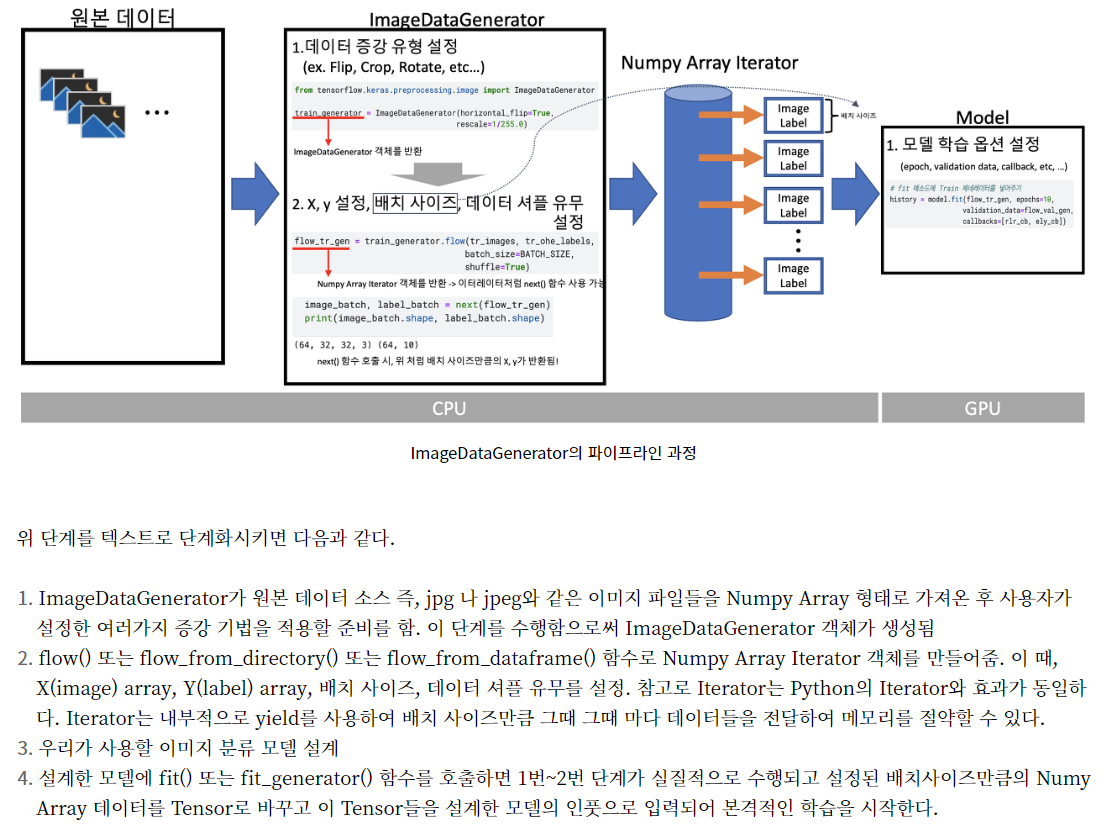

In [22]:
Image("[E-10] images/05.PNG")

### <span style = "color:orange;">flow_from_directory() 인자의 의미들</span>

- target_size: 추후에 설계할 모델에 들어갈 인풋 이미지 사이즈 중 width, height를 입력
- batch_size: 이미지 데이터 원본 소스에서 한 번에 얼마만큼의 이미지 데이터를 가지고 올 것인지
- class mode 
    - 'categorical': 'categorical_crossentropy'처럼 멀티-레이블 클래스인데, 원-핫 인코딩된 형태
    - 'sparse': 'sparse_categorical_crossentropy'처럼 멀티-레이블 클래스인데, 레이블 인코딩된 형태
    - 'binary': 'binary_crossentropy'처럼 이진 분류 클래스로, 0또는 1인 형태
[위의 참고자료 내용 필사]

**위에서 작성한 코드를 다시 보면**    
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,    
                                                     directory=train_dir,    
                                                     shuffle=True,    
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),    
                                                     class_mode='binary')    
                                                     
- batch_size는 똑같이 batch_size로 하고     
- target_size에 img_height와 img_width를 위에서 파라미터들 정해줄 때 정해준 것과 동일하게 넣었다.    
**위에서 작성한 parameter Initialization**    
batch_size = 16     
epochs = 5    
IMG_HEIGHT = 256    
IMG_WIDTH = 256    
- class mode는 우리는 개와 고양이를 구분하는 것이므로, binary_crossentropy 이진 분류 클래스를 적용,     
- 왜 binary라 적었는지 알 수 있다.

### Step 8. Data Augmentation이 제대로 되었는지 확인

In [24]:
train_data_gen[0][0].shape

(16, 256, 256, 3)

In [19]:
train_data_gen[0][0].ndim

4

In [23]:
train_data_gen.shape

AttributeError: 'DirectoryIterator' object has no attribute 'shape'

### <span style = "color:red;">음.. 왜 train_data_gen.shape은 에러가 날까?</span>

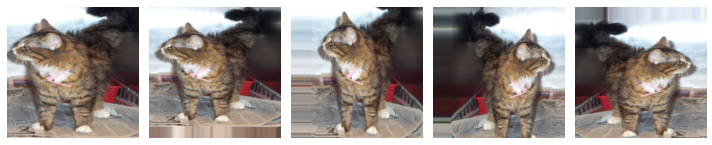

In [25]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Step 9. Validation Data에도 데이터 증강, 디렉토리와 작업환경 연결하기
- Validation 데이터에도 train 데이터와 같은 동일한 작업을 해준다.      
- 그러나 Validation 데이터는 classification이 잘 되는지 평가하는 용도로 사용되기 때문에 데이터의 스케일만 변경해 준다.    

In [15]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [16]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


### Step 10. Validation Data 확인
Validation 데이터도 크게 이미지와 정답 데이터로 구성이 되어 있다.

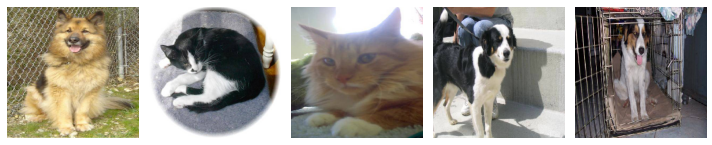

In [17]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [21]:
_[:5] # 정답 데이터

array([0., 0., 1., 0., 0.], dtype=float32)

### Step 11. VGG16 모델 구현하기

#### 노드에서 제시한 참고 코드

In [22]:
input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928 

#### 수정한 코드

In [26]:
input_layer=tf.keras.layers.Input(shape=(256, 256, 3)) 
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer) # (3, 3)은 필터의 크기인 것 같다
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x) # 그림에서는 배치노멀라이제이션이 없었는데 들어가있다
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x) # 여기도 배치노멀라이제이션
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x) 
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x) 
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)


x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x) 
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)


x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1000, activation='sigmoid')(x) # 그림에서는 소프트 맥스 사용함

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization_15 (Batc (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 128, 128, 128)     1475

In [ ]:
utils.plot_model(model)

**train_data_gen[0][0].shape 에서의 shape이 (16, 256, 256, 3)이라 
input_layer에서 shape을 (256, 256, 3)이라고 넣은 것 같다.**

### <span style = "color:red;">다시 복습하는 모델을 구성하는 방식 2가지 </span>

seauential API     
functional API

딥러닝 한 번에 끝내기 3-3. 딥러닝 모델 참조 

#### Functional API
모델 생성에 Functional API를 이용하는 방법은 가장 권장되는 방법     
Functional API는 딥러닝 모델을 복잡하고, 유연하게 구성하는 것이 가능하며, 다중 입출력을 다룰 수 있다.    

Functional API를 이용하면 Input 객체를 여러 레이어에서 사용하는 것이 가능하다.     
아래의 예제에서는 Concatenate()를 이용하여 Dense 레이어 결과와 Input을 결합했다.     
 
Functional API를 이용하면 여러 Input 객체를 사용하는 것도 가능하다.    

Functional API를 이용하면 결과를 여러개로 나눠서 사용하는 것도 가능하다.    

Functional API를 이용하여 다중 입력과 다중 출력이 가능한 모델도 만들 수 있다.   

# 여기까지 완료했습니다. 아래는 미완성입니다.    
# 추가로 더 공부해 완료해놓도록 하겠습니다.

# 7. 회고

### 1. 프로젝트에서 어려웠던 점, 해결을 위해 시도한 방법, 문제해결에 성공한 이유 또는 실패한 이유

- **프로젝트에서 어려웠던 점**  
    1. 데이터 증강, 디렉토리와 작업환경을 연결하는 것이 어려웠습니다.
    2. VGG16 모델을 노드의 그림과 같이 인풋 데이터 크기를 맞추어 모델을 구성하는게 어려웠습니다.

- **해결을 위해 시도한 방법**  
    1. 데이터 증강과 디렉토리와 작업환경을 연결하는 부분은 다른 참고자료들을 찾아봤습니다.

- **문제해결에 성공한 이유 또는 실패한 이유**  
    프로젝트에 필요한 시간을 들이지 못해 완료하지 못했습니다.

### 2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

- **프로젝트를 진행하면서 알아낸 점**

os.path.join, 데이터 증강, flow_from_directory()에 대해 알게 되었습니다.

- **아직 모호한 점**

- 아직은 프로젝트 대부분 내용이 모호합니다. 

### 3. 자기 다짐, 프로젝트를 진행하면서 느낀 점

1. 이 부분에 대한 공부가 더 필요하다고 느꼈습니다. 공부 후 다시 프로젝트를 완료해 놓겠습니다!

# 8. References

<span style = "color:gray;">import os에 대해서</span>       
https://blog.naver.com/jinho381/222410702680     

<span style = "color:gray;"> 데이터 증강 개념</span>      
https://blog.naver.com/dilector/222569536908    

<span style = "color:gray;">flow_from_directory</span>     
https://techblog-history-younghunjo1.tistory.com/261   

# 여기까지 완료했습니다. 아래는 미완성입니다.    
# 추가로 더 공부해 완료해놓도록 하겠습니다.

In [ ]:
*참고코드로 한 번 돌려보고, 처음 내가 작성한 코드로 돌려보고 어떄?

In [ ]:
손실함수, optimizer, metric을 설정해 줍니다.

손실함수와 metric은 분류 task에 따라 다양하게 바꿀 수 있습니다. optimizer도 Adam 외에 다양한 것을 사용할 수 있습니다. 자유롭게 바꿔보세요.

In [ ]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

In [ ]:
모델 학습을 시켜봅시다.
data generator는 입력 데이터와 타겟(라벨)의 batch를 끝없이 반환합니다.
batch가 끝없이 생성되기 때문에, 한 번의 epoch에 generator로부터 얼마나 많은 샘플을 뽑을지 모델에 전달해야 합니다.
만약 batch_size=20이고 steps_per_epoch=100일 경우 (데이터, 라벨)의 쌍 20개가 생성되고, 크기가 20인 batch 데이터를 100번 학습하면 1 epoch이 완료됩니다. 단, 크기 20의 batch 데이터는 매번 랜덤으로 생성됩니다.

In [ ]:
일반적으로 (전체 데이터 길이/batch_size)를 steps_per_epoch으로 설정합니다.

In [ ]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

In [ ]:
학습이 되었다면 시각화를 통해 정확도를 알아봅시다.

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 문제 1-2. 다양한 방법을 사용하여 모델의 성능 올리기

In [ ]:
hyperparameter 변경, 모델 수정, optimizer 변경, skip connection, pre-trained model 등 다양한 방법을 사용하면 모델의 성능을 높일 수 있습니다. 다양한 실험을 통해 성능을 올려 보세요.

In [ ]:
스킵 커넥션과 프리트레인드 모델 사용방법 해보면?

In [ ]:
# 문제 1-2. hyperparameter 설정
# [[YOUR CODE]]

In [ ]:
# 문제 1-2. 데이터 generator 생성
# [[YOUR CODE]]

In [ ]:
# 문제 1-2. 모델 구현
# [[YOUR CODE]]

In [ ]:
# 문제 1-2. loss function, optimizer, metric 설정 및 모델 컴파일
# [[YOUR CODE]]

In [ ]:
# 모델 학습
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 결론

In [23]:
a = np.arange(9)

In [24]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [25]:
b = a.reshape((1, -1))

In [26]:
b

array([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [27]:
b = a.reshape((1,1,-1))

In [28]:
b

array([[[0, 1, 2, 3, 4, 5, 6, 7, 8]]])

# 프로젝트 2. Object Detection

In [ ]:
1. Faster RCNN

In [ ]:
-RCNN vs Fast R-CNN vs Faster R-CNN
-Faster RCNN의 구조




In [ ]:
2. 코드 살펴보기

In [ ]:
step 1. 해당 코드는 텐서플로우 공식 홈페이지의 튜토리얼에서 제시된 코드를 활용했습니다.
먼저 필요한 라이브러리를 불러옵니다.
+ 필요한 함수들 미리 만들기

In [ ]:
!pip3 install tensorflow-estimator==2.6.0

In [ ]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈 
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile 
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

In [ ]:
이미지를 시각화하는 함수를 만들어 둡니다.

In [ ]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

In [ ]:
원하는 이미지를 다운로드하고 정해진 가로, 세로 길이에 맞게 이미지를 resizing하는 함수를 만들어둡니다.

In [ ]:
def download_and_resize_image(url, new_width=256, new_height=256, display=False): 
  
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

In [ ]:
Bounding Box를 만드는 함수를 만듭니다.

In [ ]:
def draw_bounding_box_on_image(image, 
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

In [ ]:
이미지 위에 class 이름과 score를 나타내는 함수도 만듭니다.

In [ ]:
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1): 
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

## 내가 직접 해볼 수 있는 부분 step 2? 이미지를 불러옵니다.

원하는 이미지를 불러오고, 가로와 세로를 변경해 보는 실험을 진행해 보세요.






In [ ]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)  # new_width와 new_height를 변경해 보세요.

In [ ]:
step 3. 모델 불러오기

In [ ]:
tfhub에서 사전 학습된(Pre-trained) InceptionResnet 모델을 사용한 Faster RCNN 모델을 불러옵니다.

In [ ]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"  

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

In [ ]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [ ]:
step 4. Detector를 실행하는 함수를 만듭니다.

In [ ]:
def run_detector(detector, path):
  img = load_img(path) 

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

In [ ]:
detector를 실행시켜 봅시다.

In [ ]:
run_detector(detector, downloaded_image_path)

# 문제 2-1. 다른 이미지 테스트해보기
원하는 이미지를 불러와 결과를 확인해 봅시다.

In [ ]:
# 이미지 불러오기
# [[YOUR CODE]]

In [ ]:
# 테스트
#[[YOUR CODE]]

# 문제 2-2. 다양한 pre-trained model 테스트해보기

In [ ]:
Faster RCNN 외에도 Object Detection을 할 수 있는 다양한 사전 학습 모델이 있습니다. tfhub을 탐색하여 사용할 수 있는 1개 이상의 모델을 불러와 결과를 테스트해보고, 그 결과를 비교해 보세요.

In [ ]:
# 문제 2-2. 모델 불러오기
# [[YOUR CODE]]

In [ ]:
# 문제 2-2. 테스트 
# [[YOUR CODE]]

In [ ]:
# 문제 2-2. 결과 비교
print("1번째 모델인 Inception ResNet을 사용한 Faster RCNN은 조금 느리지만 높은 정확성을 보였습니다.") 
print("2번째 모델인 ...")

In [ ]:
# 문제 2-2. 모델 불러오기
# [[YOUR CODE]]

In [ ]:
# 문제 2-2. 테스트 
# [[YOUR CODE]]

In [ ]:
# 문제 2-2. 결과 비교
print("1번째 모델인 Inception ResNet을 사용한 Faster RCNN은 조금 느리지만 높은 정확성을 보였습니다.") 
print("2번째 모델인 ...")

# 결론

# 새로 알게 된 것